# Задача 1

Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calc_logloss(y, p):
    p = np.clip(p, 0.000001,0.99999)
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

# Задача 2

На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],  # возраст репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
#X

In [5]:
def standardization(X):
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
       [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
       [ 1.        , -0.21428571, -0.46401617, -0.09388003],
       [ 1.        , -0.57142857, -0.77336028, -0.69129842],
       [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
       [ 1.        , -0.92857143, -0.36090146, -0.86198939],
       [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
       [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
       [ 1.        , -0.57142857, -1.08270439, -0.69129842],
       [ 1.        , -0.21428571,  0.05155735,  0.16215642]])

In [6]:
def eval_LR_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, pred)
        w -= eta * (1/n * np.dot((pred - y), X))
        #if i % (iterations / 10) == 0:
            #print(i, w, err)
    return err

its = [100, 1000, 5000, 10000,20000]
ets = [1e-5,1e-4,1e-3,1e-2,1e-1]
a = []
b = []
с = []
#оценка влияния итераций
for it in its:
    err = eval_LR_model(X_st, y, it, 1e-1)
    a.append(err)
print(a)

#оценка влияния скорости обучения
for e in ets:
    err = eval_LR_model(X_st, y, 1000, e)
    b.append(err)
print(b)

#оценка влияния скорости обучения
i = 0
for i in range(len(ets)):
    it = its[i]
    e = ets[i]
    err = eval_LR_model(X_st, y, it, e)
    с.append(err)
print(с)

[0.6877840044465432, 0.6433030477708257, 0.6350977257726321, 0.6348892945580527, 0.6348870257632299]
[1.0207008731979104, 1.0074523353127354, 0.8942972239405573, 0.687545917538793, 0.6433030477708257]
[1.022047593429887, 1.0074523353127354, 0.7105618247160163, 0.6432981685955533, 0.6348870257632299]


[]

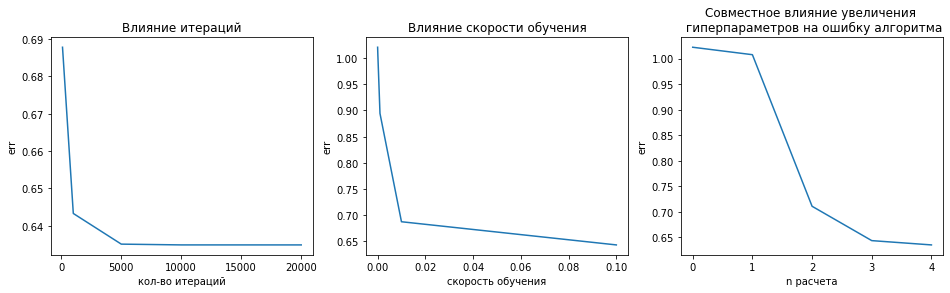

In [7]:
fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(its,a)
plt.xlabel('кол-во итераций')
plt.ylabel('err')
plt.title('Влияние итераций')

plt.subplot(1, 3, 2)
plt.plot(ets,b)
#plt.xscale('log')
plt.xlabel('скорость обучения')
plt.ylabel('err')
plt.title('Влияние скорости обучения')
plt.plot()

plt.subplot(1, 3, 3)
plt.plot(с)
#plt.xscale('log')
plt.xlabel('n расчета')
plt.ylabel('err')
plt.title('Совместное влияние увеличения \n гиперпараметров на ошибку алгоритма')
plt.plot()

Вывод: чем больше итераций, тем меньше ошибка алгоритма. И чем меньше скорость обучения, тем выше ошибка. Увеличение числа итераций и скорости обучения ведет к уменьшению ошибки.

# Задача 3

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model.

In [8]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, pred)
        w -= eta * (1/n * np.dot((pred - y), X))
        #if i % (iterations / 10) == 0:
            #print(i, w, err)
    return w

In [9]:
def calc_pred_proba(X,w):
    pred = sigmoid(np.dot(X_st, w))
    p_1 = []
    i = 0
    for p in pred:        
        if p > 0.5:
            p_1.append({i:1})
        i+=1
    return p_1

In [10]:
p = calc_pred_proba(X,eval_LR_model(X, y, 1000, eta=1e-4))
print (f'Cлучаи, когда предсказанная вероятность "1" - {p}')
i = 0
fact=[]
for item in y:
    if item == 1:
        fact.append({i:item})
    i+=1
print (f'Исходные данные с классом "1"- {fact}')

Cлучаи, когда предсказанная вероятность "1" - [{1: 1}, {2: 1}, {4: 1}, {6: 1}, {7: 1}, {9: 1}]
Исходные данные с классом "1"- [{2: 1}, {4: 1}, {6: 1}, {8: 1}, {9: 1}]


# Задача 4

Создайте функцию calc_pred, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, а также порог вероятности.

In [11]:
def calc_pred(X,w,porog):
    pred = sigmoid(np.dot(X_st, w))
    pred = np.where(pred > porog, 1, 0)
    return pred

In [27]:
p = calc_pred(X,eval_LR_model(X, y, 1000, eta=1e-4), 0.5)
p

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

# Задача 5

(*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [36]:
def accuracy(pred, y):
    i = 0
    ac = 0
    for i in range(len(pred)):
        if pred[i] == y[i]:
            ac = ac + 1
        i+=1
    return ac/(len(pred))*100

In [37]:
err = accuracy(p, y)
print(f'Точность алгоритма на данных примера - {err}%')

Точность алгоритма на данных примера - 70.0%


In [38]:
def err_matrix (pred, y):
    TP = ((y == 1) & (pred == 1)).sum()
    FP = ((y == 0) & (pred == 1)).sum()
    FN = ((y == 1) & (pred == 0)).sum()
    TN = ((y == 0) & (pred == 0)).sum()
    return [[TP,FP],[FN,TN]]

In [48]:
errs = err_matrix (p, y)
print (f'На данных примера TP - {errs[0][0]}, FP - {errs[0][1]}, FN -  {errs[1][0]}, TN -  {errs[1][1]}.')
errs

На данных примера TP - 4, FP - 2, FN -  1, TN -  3.


[[4, 2], [1, 3]]

In [40]:
def precision (pred, y):
    TP = ((y == 1) & (pred == 1)).sum()
    FP = ((y == 0) & (pred == 1)).sum()
    return TP/(TP+FP)

In [41]:
error = precision (p, y)
print (f'На данных примера точность - {round(error,2)}')

На данных примера точность - 0.67


In [42]:
def recall (pred, y):
    TP = ((y == 1) & (pred == 1)).sum()
    FN = ((y == 1) & (pred == 0)).sum()
    return  TP/(TP+FN)

In [43]:
error = recall (p, y)
print (f'На данных примера полнота - {round(error,2)}')

На данных примера полнота - 0.8


In [44]:
def F_mera (pred, y):
    F_mera = 2*precision (pred, y)*recall (pred, y)/(precision (pred, y)+recall (pred, y))
    return F_mera

In [45]:
F = F_mera (p, y)
print (f'На данных примера F-мера = {round(F,2)}')

На данных примера F-мера = 0.73


In [46]:
def F1_mera (pred, y, beta):
    F_mera = (1+beta**2)*precision (pred, y)*recall (pred, y)/(beta**2*precision (pred, y)+recall (pred, y))
    return F_mera

In [47]:
F1 = F1_mera (p, y, 1)
print (f'На данных примера F1-мера = {round(F1,2)}')

На данных примера F1-мера = 0.73
